<a href="https://colab.research.google.com/github/gowtham2001/Python-Programs/blob/main/NetflixDataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


In [8]:
df=pd.read_csv("/content/netflix_titles.csv")
df.shape
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
df.isna().sum().sum()


3631

In [10]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
print("Number of rows: ", len(df))

Number of rows:  7787


In [13]:
df.director.fillna('No Director',inplace=True)

In [15]:
df.cast.fillna('No cast',inplace=True)

In [16]:
df.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [17]:
df.country.fillna('unavailable',inplace=True)

df.dropna(subset=['date_added','rating'],inplace=True)

In [20]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

[2861 1928  804  665  386  279  270  247  194   83   39    6    5    3]


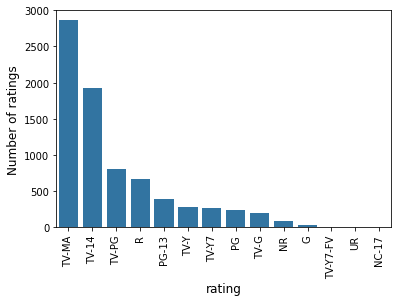

In [48]:
base_color = sns.color_palette()[0]
genOrder=df['rating'].value_counts().index
sns.countplot(data = df, x='rating',color=base_color,order=genOrder)
plt.xticks(rotation = 90)
plt.ylabel('Number of ratings',fontsize=12)
plt.xlabel('rating',fontsize=12)
plt.show()


(-1.1296363902934494,
 1.4563013330525483,
 -1.3526803752623908,
 1.2332573480836069)

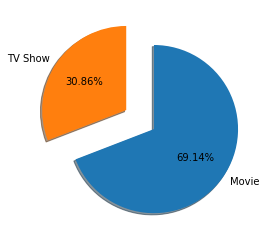

In [57]:
sorted_counts = df['type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False,autopct='%1.2f%%',explode=(0.4,0),shadow=True)
plt.axis('square')


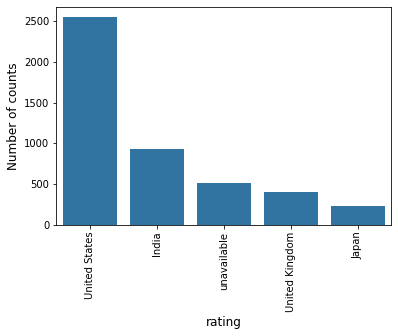

In [60]:
base_color = sns.color_palette()[0]
genOrder=df['country'].value_counts().iloc[:5].index
sns.countplot(data = df, x='country',color=base_color,order=genOrder)
plt.xticks(rotation = 90)
plt.ylabel('Number of counts',fontsize=12)
plt.xlabel('rating',fontsize=12)
plt.show()

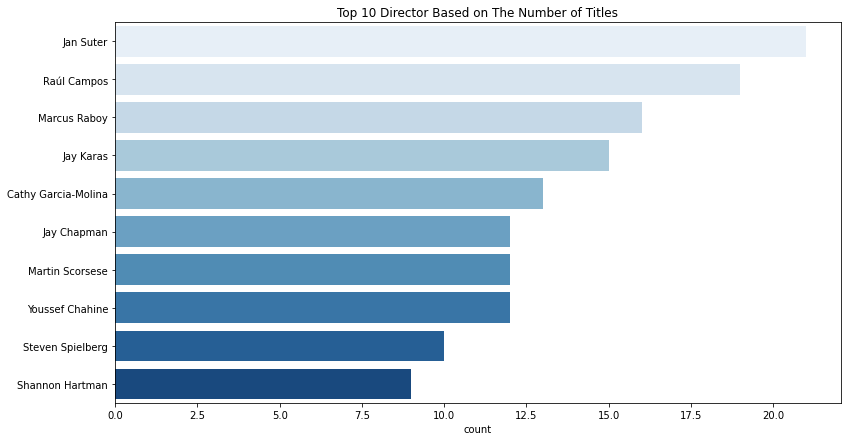

In [29]:

fil=df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = fil, order=fil.value_counts().index[:10], palette='Blues')
plt.show()


fil=df[df.country != 'unavailable'].set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 countries Based on The Number of Titles')
sns.countplot(y = fil, order=fil.value_counts().index[:10], palette='Blues')
plt.show()

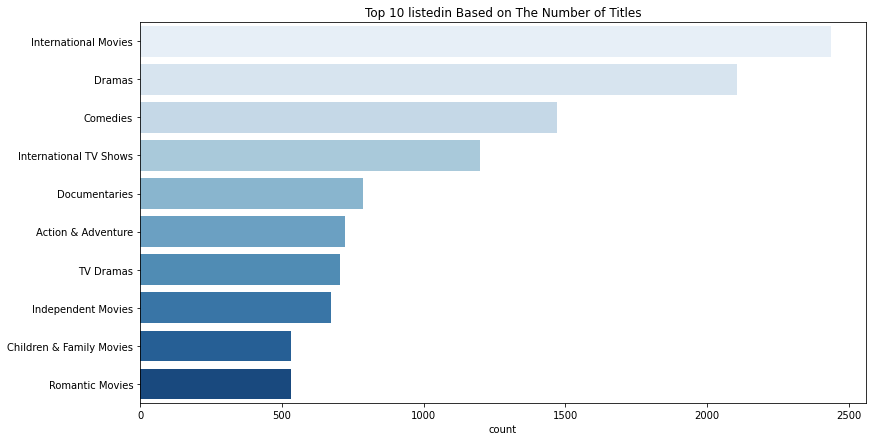

In [38]:
fil=df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 listedin Based on The Number of Titles')
sns.countplot(y = fil, order=fil.value_counts().index[:10], palette='Blues')
plt.show()

No handles with labels found to put in legend.


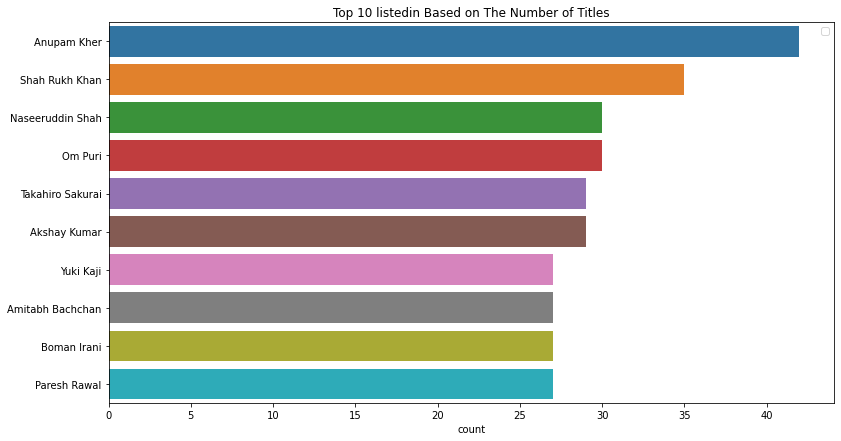

In [95]:
fil=df[df.cast!='No cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 listedin Based on The Number of Titles')
labels=['Tv Show','Movie']
sns.countplot(y = fil, order=fil.value_counts().index[:10])
plt.legend()
plt.show()

No handles with labels found to put in legend.


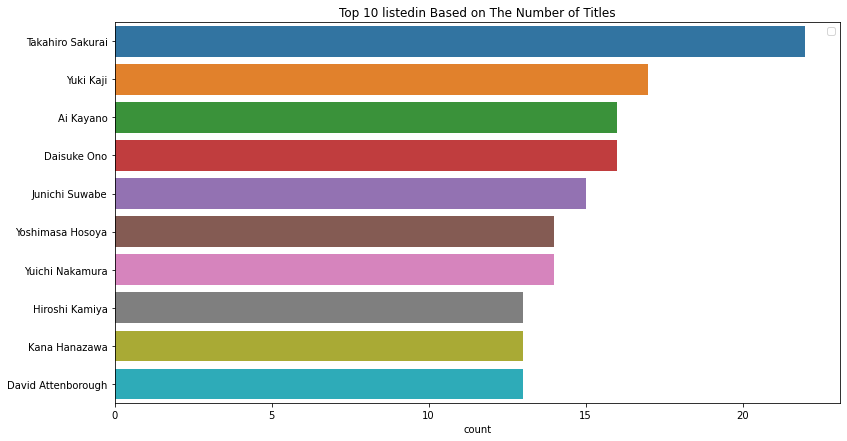

In [99]:
fil=df[df.type!='Movie'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 listedin Based on The Number of Titles')
labels=['Tv Show','Movie']
sns.countplot(y = fil, order=fil.value_counts().index[:10])
plt.legend()
plt.show()

No handles with labels found to put in legend.


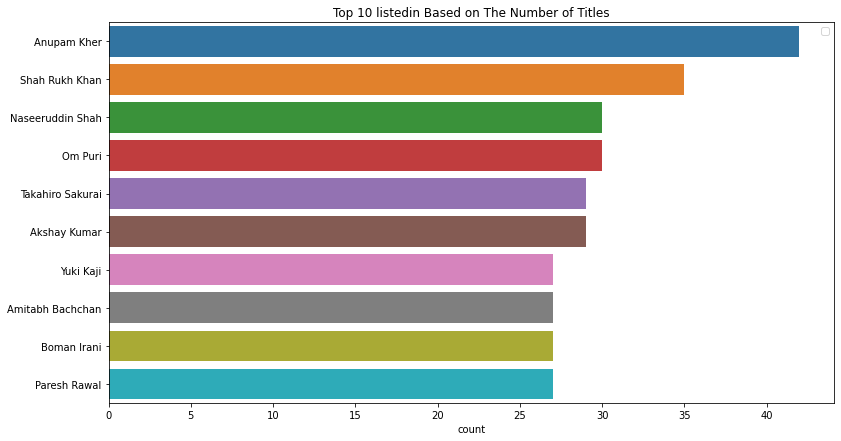

In [97]:
fil=df[df.type!='Tv Show'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 listedin Based on The Number of Titles')
labels=['Tv Show','Movie']
sns.countplot(y = fil, order=fil.value_counts().index[:10])
plt.legend()
plt.show()

fil=df['duration'].value_counts().index[:20]
sns.countplot(data=df,x='duration',order=fil)
plt.xticks(rotation=90)

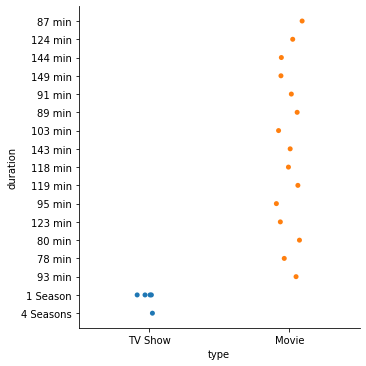

In [84]:
fil=df['duration'][:20] 
sns.catplot(x='type',y=fil,data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

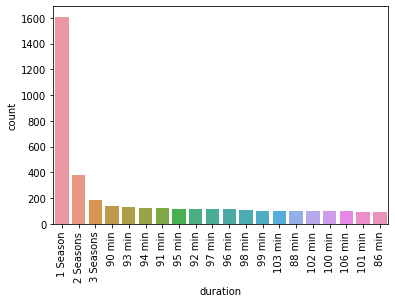

In [108]:
fil=df['duration'].value_counts().index[:20] 
sns.countplot(data=df,x='duration',order=fil) 
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

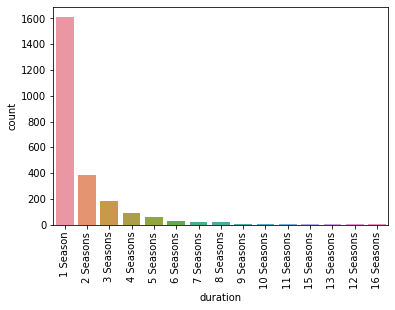

In [102]:
fil=df[df.type!='Movie'].set_index('title').duration.str.split(',',expand=True).stack().reset_index(level=1,drop=True) 
sns.countplot(data=df,x='duration',order=fil.value_counts().index) 
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

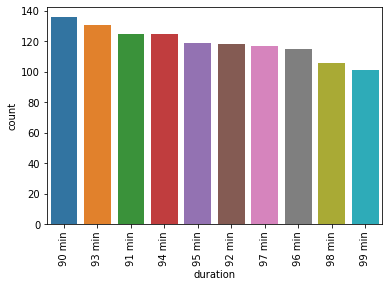

In [109]:
fil=df[df.type!='TV Show'].set_index('title').duration.str.split(',',expand=True).stack().reset_index(level=1,drop=True) 
sns.countplot(data=df,x='duration',order=fil.value_counts().iloc[:10].index) 
plt.xticks(rotation=90)